In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.cluster.hierarchy import linkage, dendrogram



VSS

C:\Users\andra\AppData\Local\Temp\ipykernel_324\2246014639.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_subjects = df.drop(columns=["student_id"]).applymap(


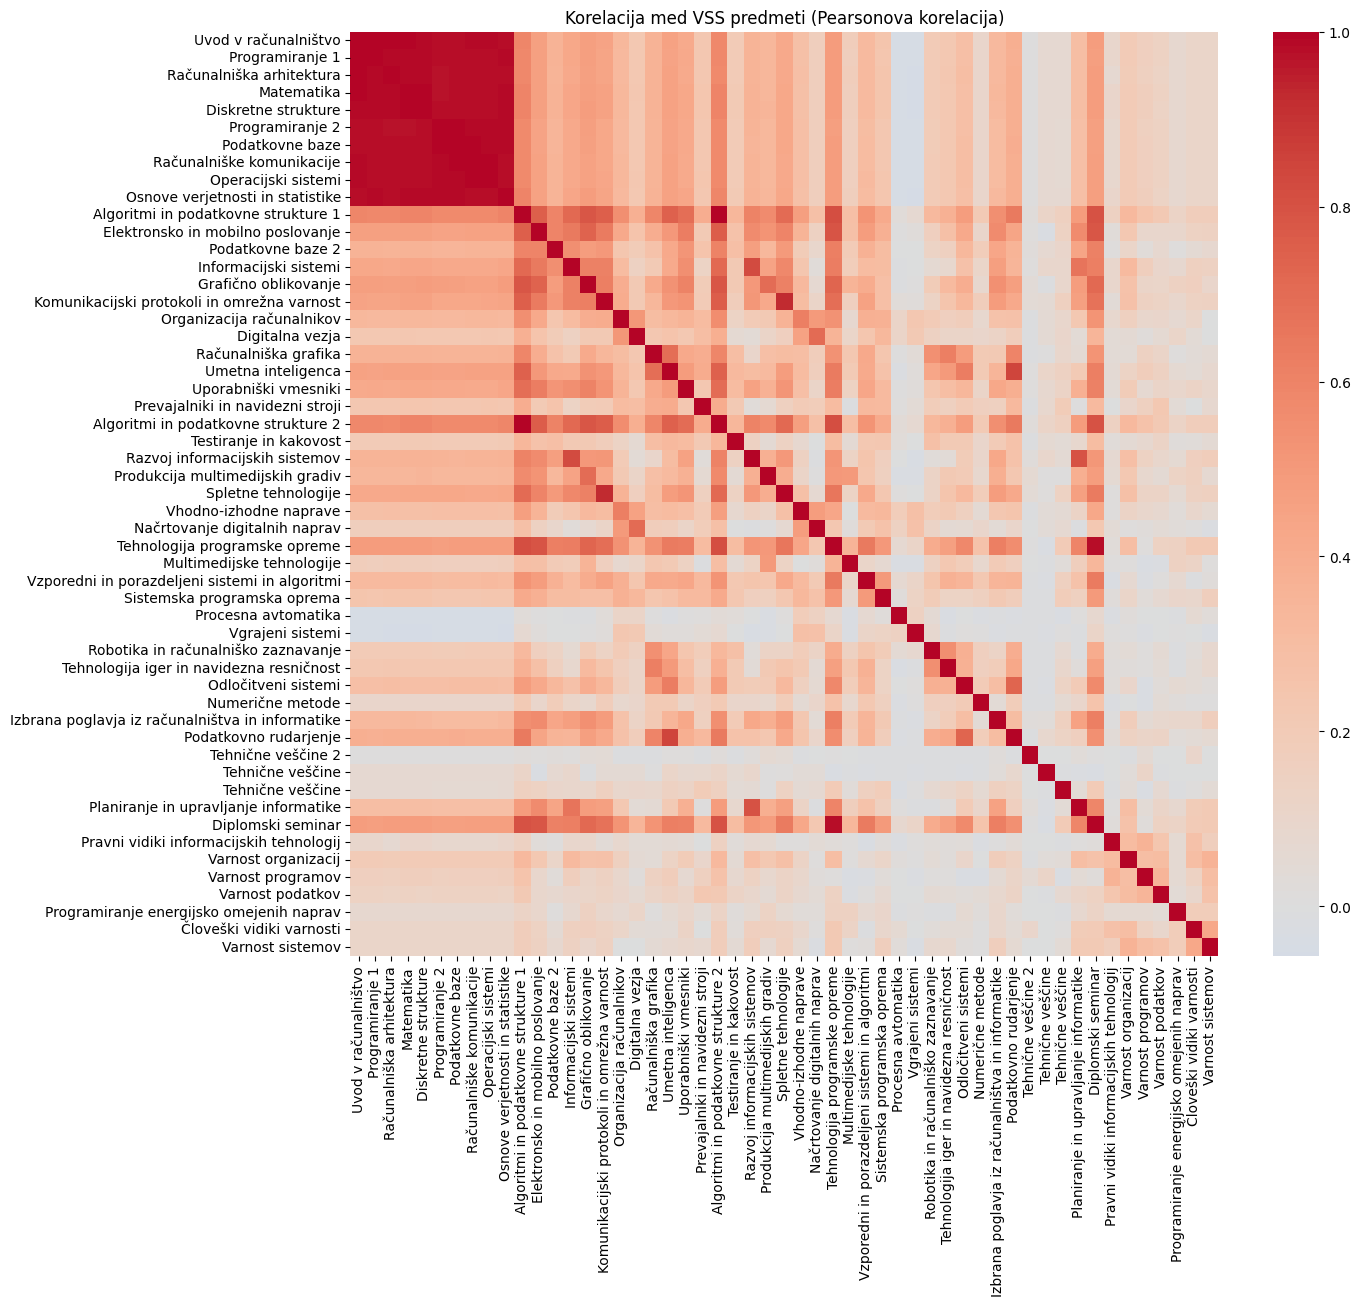

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.cluster.hierarchy import linkage, dendrogram


df = pd.read_csv("students_final.csv")

subject_info = pd.read_csv("subjects_3.csv")

# Odstrani predmete s 'ni vnosov'
subject_info = subject_info[~subject_info['student_year'].astype(str).str.contains("ni vnosov")]

vss_subjects = subject_info[subject_info['subject_program'] == 'VSS']

subject_name_map = dict(zip(vss_subjects['subject_id'], vss_subjects['subject_name']))

vss_subject_ids = set(vss_subjects['subject_id'])

all_subjects = df.drop(columns=["student_id"]).applymap(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
combined_subjects = all_subjects.apply(lambda row: set(sum(row.dropna().tolist(), [])), axis=1)

filtered_subjects = combined_subjects.apply(lambda s: s & vss_subject_ids)

df["all_subjects"] = filtered_subjects

all_subject_ids = sorted(set().union(*df["all_subjects"]))

subject_matrix = pd.DataFrame(0, index=df.index, columns=all_subject_ids)

for i, subjects in enumerate(df["all_subjects"]):
    subject_matrix.loc[i, list(subjects)] = 1

subject_matrix.columns = [subject_name_map.get(subj_id, subj_id) for subj_id in subject_matrix.columns]

correlation_matrix = subject_matrix.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Korelacija med VSS predmeti (Pearsonova korelacija)")
plt.show()


C:\Users\andra\AppData\Local\Temp\ipykernel_324\2199485811.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


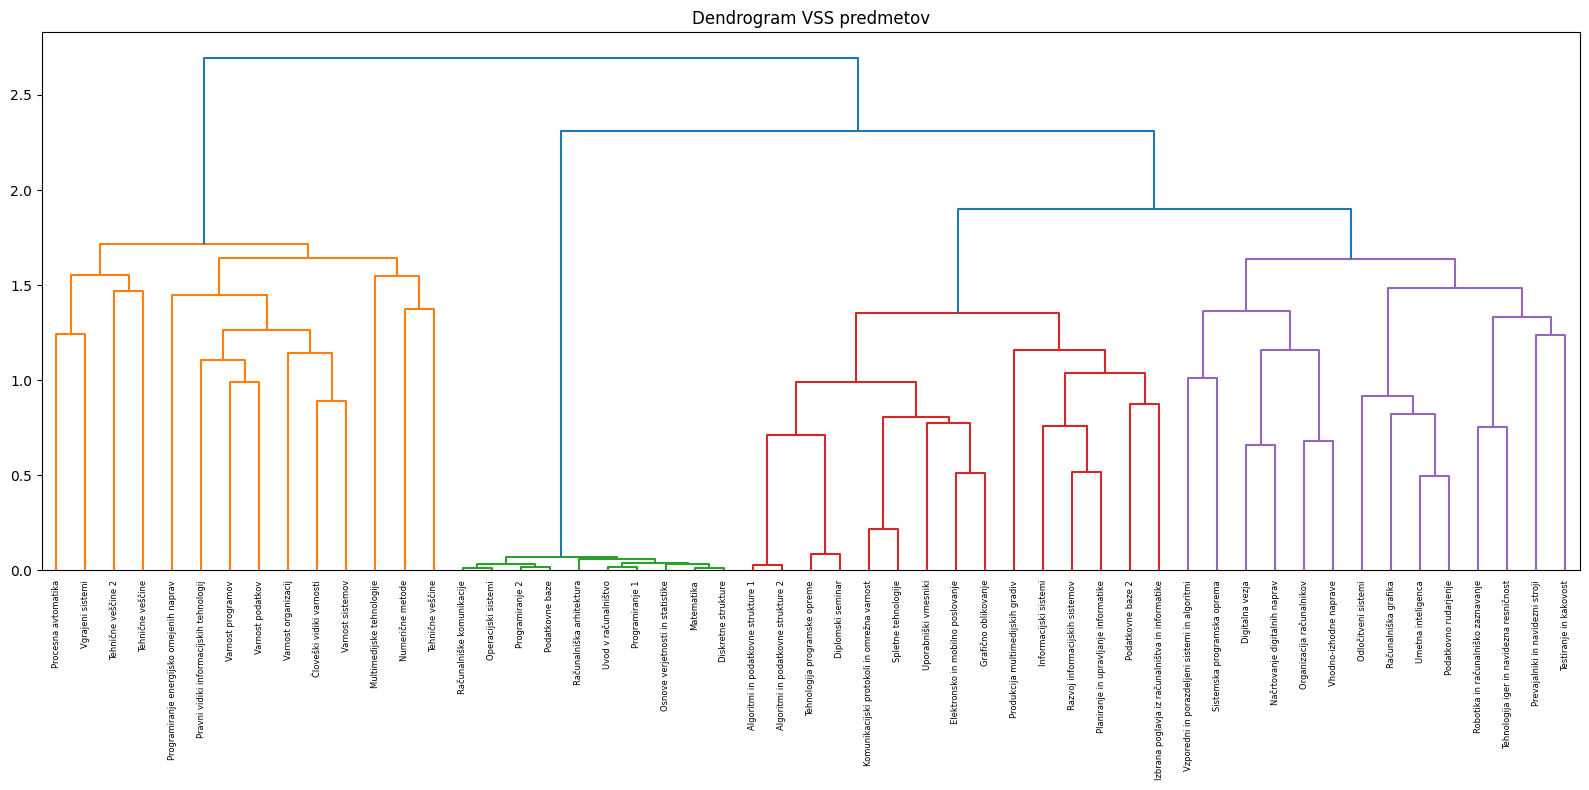

In [9]:

# Uporabi korelacijsko matriko za izračun razdalj (1 - korelacija)
distance_matrix = 1 - correlation_matrix

# Pretvori v nosilno matriko za linkage
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(16, 8))
dendrogram(linked, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("Dendrogram VSS predmetov")
plt.tight_layout()
plt.show()

UNI

C:\Users\andra\AppData\Local\Temp\ipykernel_324\1544446225.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_subjects = df.drop(columns=["student_id"]).applymap(


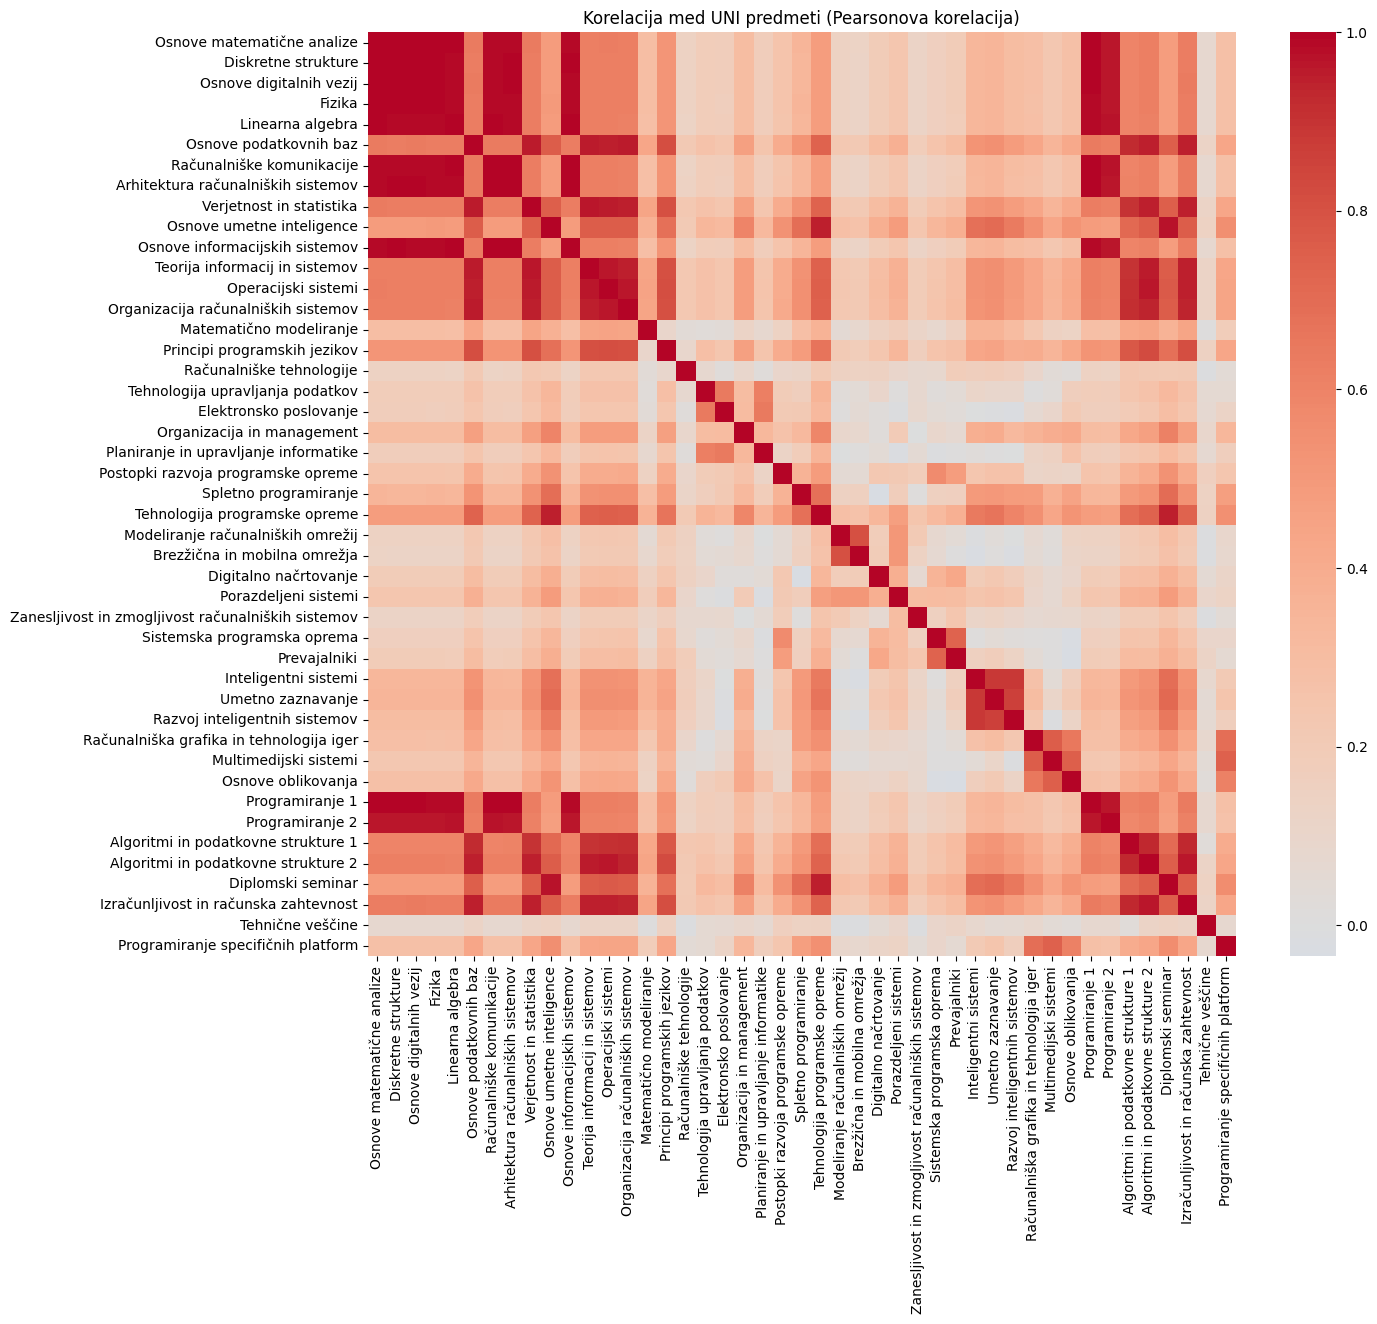

In [10]:

df = pd.read_csv("students_final.csv")

subject_info = pd.read_csv("subjects_3.csv")

# Odstrani predmete s 'ni vnosov'
subject_info = subject_info[~subject_info['student_year'].astype(str).str.contains("ni vnosov")]

vss_subjects = subject_info[subject_info['subject_program'] == 'UNI']

subject_name_map = dict(zip(vss_subjects['subject_id'], vss_subjects['subject_name']))

vss_subject_ids = set(vss_subjects['subject_id'])

all_subjects = df.drop(columns=["student_id"]).applymap(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
combined_subjects = all_subjects.apply(lambda row: set(sum(row.dropna().tolist(), [])), axis=1)

filtered_subjects = combined_subjects.apply(lambda s: s & vss_subject_ids)

df["all_subjects"] = filtered_subjects

all_subject_ids = sorted(set().union(*df["all_subjects"]))

subject_matrix = pd.DataFrame(0, index=df.index, columns=all_subject_ids)

for i, subjects in enumerate(df["all_subjects"]):
    subject_matrix.loc[i, list(subjects)] = 1

subject_matrix.columns = [subject_name_map.get(subj_id, subj_id) for subj_id in subject_matrix.columns]

correlation_matrix = subject_matrix.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Korelacija med UNI predmeti (Pearsonova korelacija)")
plt.show()


C:\Users\andra\AppData\Local\Temp\ipykernel_324\3986883189.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


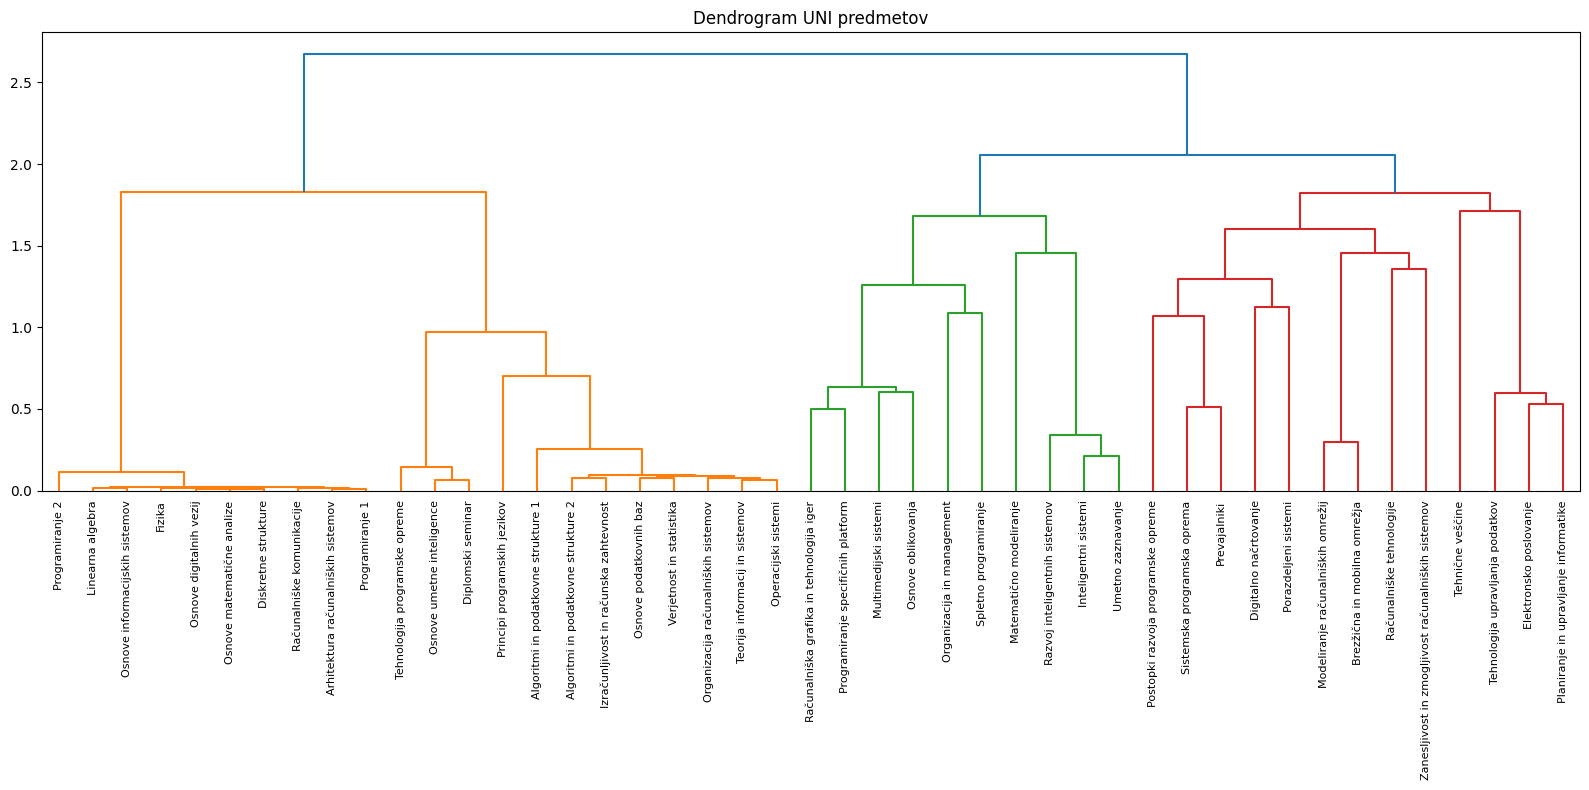

In [11]:

# Uporabi korelacijsko matriko za izračun razdalj (1 - korelacija)
distance_matrix = 1 - correlation_matrix

# Pretvori v nosilno matriko za linkage
linked = linkage(distance_matrix, method='average')

plt.figure(figsize=(16, 8))
dendrogram(linked, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("Dendrogram UNI predmetov")
plt.tight_layout()
plt.show()